In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


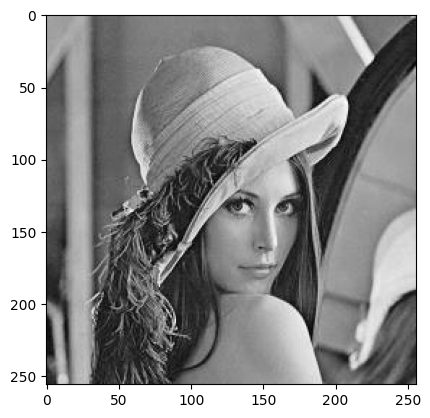

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gImg, cmap='gray')
#cv2_imshow(gImg)

**로버츠 검출기**

In [7]:
gx = np.array([[-1, 0],[0,1]], dtype=int)
gy = np.array([[0, -1],[1,0]], dtype=int)

In [8]:
gx = np.array([[-1, 0, 0],[0, 1, 0], [0, 0, 0]], dtype=int)
gy = np.array([[0, 0, -1],[0, 1, 0], [0, 0, 0]], dtype=int)

**소벨 검출기**

In [ ]:
gx = np.array([[-1, 0, 0],[-2, 0, -2], [-1, 0, 1]], dtype=int)
gy = np.array([[1, 2, 1],[0, 0, 0], [-1, -2, -1]], dtype=int)

**프리윗 검출기**

In [28]:
gx = np.array([[-1, 0, 0],[-1, 0, 1], [-1, 0, 1]], dtype=int)
gy = np.array([[1, 1, 1],[0, 0, 0], [-1, -1, -1]], dtype=int)

**예지 검출**

In [9]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [10]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

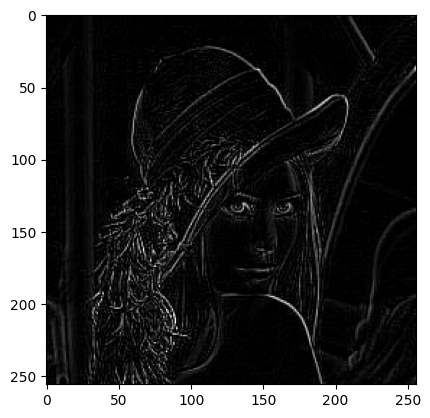

In [13]:
outImg = cv2.addWeighted(absX, 1, absY, 1, 0)
plt.imshow(outImg, cmap='gray')
#cv2_imshow(outImg)

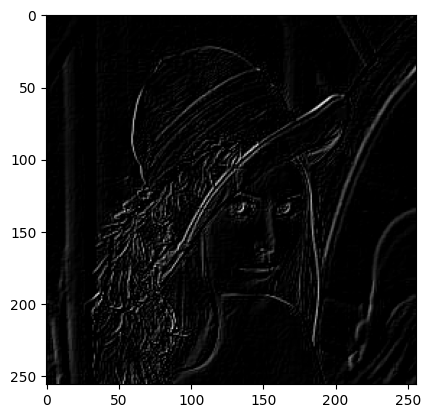

In [14]:
plt.imshow(absX, cmap='gray')

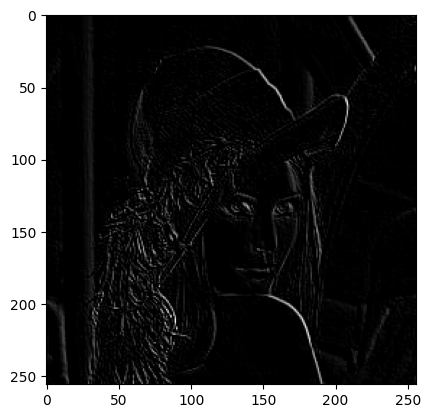

In [15]:
plt.imshow(absY, cmap='gray')

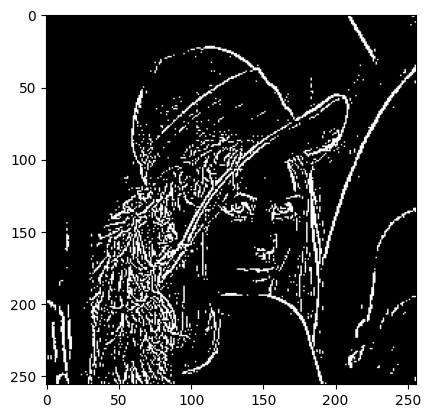

In [27]:
gBin = np.zeros(gImg.shape, dtype=int)

threshold = 30

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if outImg[i, j] > threshold:
      gBin[i, j] = 255

plt.imshow(gBin, cmap='gray')

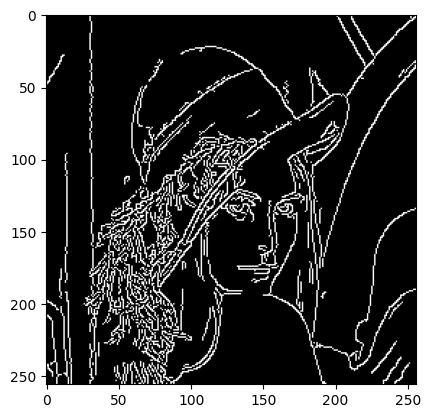

In [30]:
outImg = cv2.Canny(gImg, 100, 200)
plt.imshow(outImg, cmap='gray')